# Mushrom dataset analysis

Here we start with having the precursor mass associated with the molecular families of: erinacerin, herinacernes and ergostanes, obtained by: https://www.biorxiv.org/content/10.1101/2024.02.09.579616v1.full

In [ ]:
#%matplotlib agg
import sys, os
sys.path.insert(0, '../../')
from MS2LDA.motif_parser import load_m2m_folder
import tomotopy as tp
from matchms.importing import load_from_mgf
from MS2LDA.Preprocessing.load_and_clean import clean_spectra

In [ ]:
lda_model = tp.LDAModel.load('CaseStudy_Mushrooms_200/ms2lda.bin')

We need to clean the mushroom dataset to localise the precursor masses

In [ ]:
mushroom_mgf = '../../datasets/Case_Study_Fungal_dataset.mgf'

In [4]:
preprocessing_parameters = {
    "min_mz": 0, #
    "max_mz": 2000,
    "max_frags": 1000,
    "min_frags": 5,
    "min_intensity": 0.01,
    "max_intensity": 1
}

In [5]:
mushroom_spectra = list(load_from_mgf(mushroom_mgf))


In [6]:
cleaned_spectra = clean_spectra(mushroom_spectra, preprocessing_parameters)


### We have the precursor list of the molecular families:

In [7]:
prec_list = [
240.0866,  
254.1021,  
296.149,
282.1334,  
284.1126,
311.1234, 
312.1076,  
325.1391,  
339.1547,  
381.2016,  
415.1859,  
413.1702,  
379.186,  
395.2176,  
365.1703,  
381.2015,  
367.186,  
415.1859,  
330.1181,  
268.1176,  
330.1181,  
210.1126,  
297.1081,  
330.1181,  
445.2332,  
446.2171,  
375.3046,  
375.3047,  
377.32,  
377.3202,  
377.3202,  
377.3202,  
377.3202,  
377.3203,  
391.2993,  
393.3149,  
393.315,  
393.3152,  
395.3311,  
407.2936,  
409.31,  
409.3101,  
395.3307,  
395.3308,  
571.3993,  
597.4149,  
602.4413,  
571.3995,  
599.4308,  
599.4307,  
585.4151,  
543.3682,  
613.4461,  
417.2381,  
609.4145,  
375.18,  
637.4098,  
611.4297,  
461.2643,  
585.4149,  
595.3994,  
571.3986,  
609.3767,  
557.3839,  
445.3311,
]

Identify those spectras associated with the prec list

In [8]:
def spectra_prec_find(spectra, prec_list):
    prec_spectra = []
    spectras_filtered = []
    for idx, spec in enumerate(spectra):
        precursor_mz = spec.get("precursor_mz")
        if precursor_mz in prec_list:
            prec_spectra.append((idx, spec, precursor_mz))
            spectras_filtered.append(spec)
    
    prec_spectra.sort(key=lambda x: x[2])
    return prec_spectra,spectras_filtered

prec_spectra_with_precursor, spectras_filtered = spectra_prec_find(cleaned_spectra, prec_list)

In [9]:
spectra_idx=[]
prec_list=[]
for i in prec_spectra_with_precursor:
    spectra_idx.append(i[0])
    prec_list.append(i[2])
    #print(i[2])

Then join this in two files

## We are obtaining the top motifs for each document

In [10]:
prec_list

[210.1126,
 240.0866,
 240.0866,
 240.0866,
 254.1021,
 254.1021,
 254.1021,
 268.1176,
 268.1176,
 268.1176,
 282.1334,
 282.1334,
 282.1334,
 284.1126,
 284.1126,
 296.149,
 297.1081,
 297.1081,
 311.1234,
 312.1076,
 325.1391,
 325.1391,
 330.1181,
 339.1547,
 339.1547,
 365.1703,
 367.186,
 375.18,
 375.3046,
 375.3047,
 377.32,
 377.3202,
 377.3202,
 377.3202,
 377.3202,
 377.3202,
 377.3203,
 379.186,
 381.2015,
 381.2016,
 391.2993,
 393.3149,
 393.315,
 393.315,
 393.3152,
 395.2176,
 395.3307,
 395.3307,
 395.3308,
 395.3311,
 407.2936,
 409.31,
 409.31,
 409.3101,
 413.1702,
 415.1859,
 415.1859,
 417.2381,
 445.2332,
 445.3311,
 446.2171,
 461.2643,
 543.3682,
 557.3839,
 571.3986,
 571.3993,
 571.3995,
 585.4149,
 585.4151,
 595.3994,
 597.4149,
 599.4307,
 599.4308,
 602.4413,
 609.3767,
 609.4145,
 611.4297,
 613.4461,
 637.4098]

In [11]:
for item1, item2 in zip(spectra_idx, prec_list):
    print(item1, item2)

311 210.1126
107 240.0866
194 240.0866
934 240.0866
142 254.1021
170 254.1021
282 254.1021
113 268.1176
162 268.1176
376 268.1176
193 282.1334
413 282.1334
483 282.1334
175 284.1126
231 284.1126
579 296.149
95 297.1081
856 297.1081
214 311.1234
135 312.1076
365 325.1391
426 325.1391
150 330.1181
92 339.1547
380 339.1547
401 365.1703
478 367.186
1120 375.18
1885 375.3046
1658 375.3047
1293 377.32
1802 377.3202
2073 377.3202
2226 377.3202
2360 377.3202
2621 377.3202
2439 377.3203
489 379.186
547 381.2015
487 381.2016
1674 391.2993
2055 393.3149
1859 393.315
2368 393.315
1648 393.3152
627 395.2176
1369 395.3307
1803 395.3307
2064 395.3308
2348 395.3311
1667 407.2936
1650 409.31
1986 409.31
1780 409.3101
545 413.1702
505 415.1859
569 415.1859
709 417.2381
1105 445.2332
1776 445.3311
1153 446.2171
657 461.2643
2249 543.3682
2337 557.3839
2287 571.3986
2419 571.3993
2501 571.3995
2399 585.4149
2537 585.4151
2354 595.3994
2479 597.4149
2611 599.4307
2583 599.4308
2401 602.4413
1881 609.3767
2

In [12]:
output_file = "mushroom_topic_dist_2.txt"

with open(output_file, "w") as file:
    for spectra, prec in zip(spectra_idx, prec_list):
        doc = lda_model.docs[spectra]
        topic_dist = doc.get_topic_dist()  
        top_topics = sorted(enumerate(topic_dist), key=lambda x: x[1], reverse=True)[:3]  # Get top 3 topics

        file.write(f"Precursor {prec}: Top 3 Topics:\n")
        for top_id, proportion in top_topics: 
            file.write(f"  Topic {top_id}: {proportion:.4f}\n")


In [ ]:
motif_spectra_200=load_m2m_folder('CaseStudy_Mushrooms_200/motifs')

In [14]:
motif_spectra_200[158].metadata

{'id': 'motif_22',
 'charge': '1',
 'ms2accuracy': '0.005',
 'motifset': 'motifs',
 'short_annotation': 'None',
 'annotation': 'None',
 'auto_annotation': "['CCCCCCCCC=CCCCCCCCCCC(=O)NC(CCCN)C(=O)O', 'CCCCCC=CCC=CCCCCCCCCCCCC(=O)NC(CCCN)C(=O)O', 'CCCCCCCCCCCCCCCC(=O)NC(CCCN)C(=O)O']"}

In [15]:
motif_spectra_200[158].peaks.mz

array([ 58.07,  59.07,  68.05,  70.07,  71.05,  72.08,  98.06, 112.09,
       113.07, 114.06, 116.07, 116.11, 158.09, 217.09, 219.1 , 227.1 ,
       275.13, 365.17, 519.37, 588.43, 612.43, 616.46])

In [16]:
def check_overlap(spec, intensities, motif1, motif2):
    zebra_frags = []  # To store fragments for zebra coloring
    zebra_intens = []  # To store their intensities
    labels = {}  # For labeling
    # Other fragments in motif1 or motif2 will have normal coloring
    green_frags = []
    green_intens = []
    blue_frags = []
    blue_intens = []
    for frag, intens in zip(spec.peaks.mz, intensities):
        rounded_frag = round(frag, 2)
        if rounded_frag in motif1.peaks.mz and rounded_frag in motif2.peaks.mz:
            zebra_frags.append(frag)
            zebra_intens.append(intens)
            labels[frag] = rounded_frag  # Store for labeling
        elif rounded_frag in motif1.peaks.mz:
            green_frags.append(frag)
            green_intens.append(intens)
            labels[frag] = rounded_frag
        elif rounded_frag in motif2.peaks.mz:
            blue_frags.append(frag)
            blue_intens.append(intens)
            labels[frag] = rounded_frag
    print(green_frags)
    print(blue_frags)
    print(zebra_frags)
    return green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels

[70.0658, 227.1023]
[122.06, 168.0653, 182.081]
[]


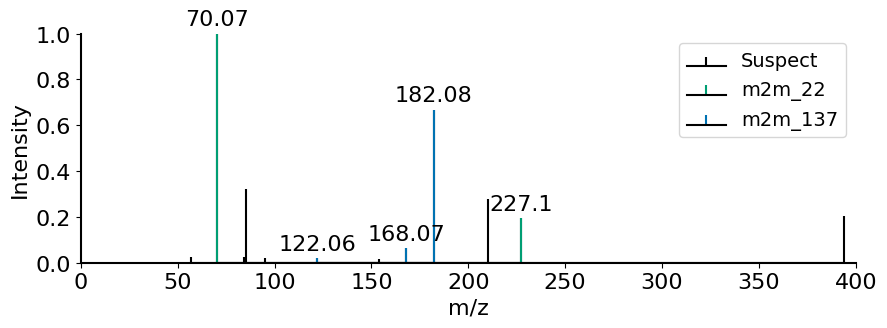

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("red", "lightgreen")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 209 #suspect spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[53].peaks.mz #158 is motif 22
motif1_intensities = motif_spectra_200[53].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[158].peaks.mz #motif 137
motif2_intensities = motif_spectra_200[158].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[158], motif_spectra_200[53])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Suspect")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="#009e73", label="m2m_22")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="#0072b2", label="m2m_137")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="#0072b2", label="m2m_137")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("#009e73", "#0072b2"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:8]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
    else:
        ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,400)
ax1.set_xlabel('m/z', fontsize=16)
ax1.set_ylabel('Intensity', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
ax1.tick_params(axis='x', labelsize=16)  # Change font size of x-axis ticks
ax1.tick_params(axis='y', labelsize=16)  #
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


[72.0815, 98.0605, 116.0708]
[55.0551, 69.0706, 80.05, 122.0602, 132.0445, 140.0707, 150.0552, 168.0656]
[]


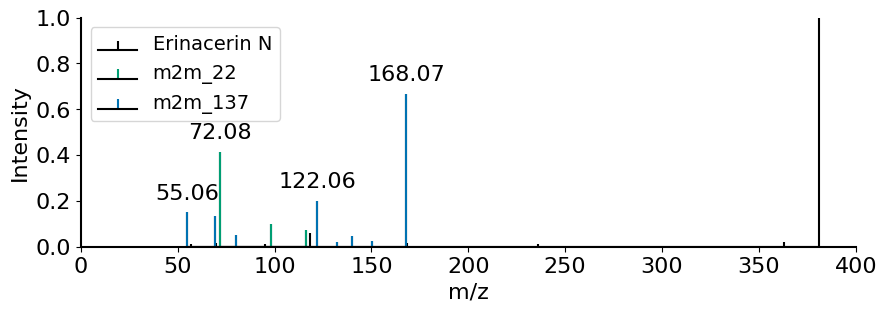

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("red", "lightgreen")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 547 #erinacerin spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[53].peaks.mz #158 is motif 22
motif1_intensities = motif_spectra_200[53].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[158].peaks.mz #motif 137
motif2_intensities = motif_spectra_200[158].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[158], motif_spectra_200[53])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Erinacerin N")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="#009e73", label="m2m_22")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="#0072b2", label="m2m_137")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="#0072b2", label="m2m_137")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("#009e73", "#0072b2"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:4]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
    else:
        ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,400)
ax1.set_xlabel('m/z', fontsize=16)
ax1.set_ylabel('Intensity', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
ax1.tick_params(axis='x', labelsize=16)  # Change font size of x-axis ticks
ax1.tick_params(axis='y', labelsize=16)  #
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


In [19]:
def check_overlap_1motif(spec, intensities, motif1):
    zebra_frags = []  # To store fragments for zebra coloring
    zebra_intens = []  # To store their intensities
    labels = {}  # For labeling
    # Other fragments in motif1 or motif2 will have normal coloring
    green_frags = []
    green_intens = []
    for frag, intens in zip(spec.peaks.mz, intensities):
        rounded_frag = round(frag, 2)
        if rounded_frag in motif1.peaks.mz:
            zebra_frags.append(frag)
            zebra_intens.append(intens)
            labels[frag] = rounded_frag  # Store for labeling
        elif rounded_frag in motif1.peaks.mz:
            green_frags.append(frag)
            green_intens.append(intens)
            labels[frag] = rounded_frag
    print(green_frags)
    print(zebra_frags)
    return green_frags, green_intens, zebra_frags, zebra_intens, labels

[]
[69.0705, 132.0444, 134.0599, 137.0599, 149.0591, 162.0549, 164.0704, 178.0498, 192.0653, 200.0702, 202.0859, 218.0809, 230.0809, 316.1901, 354.2056, 400.2112, 428.2062]


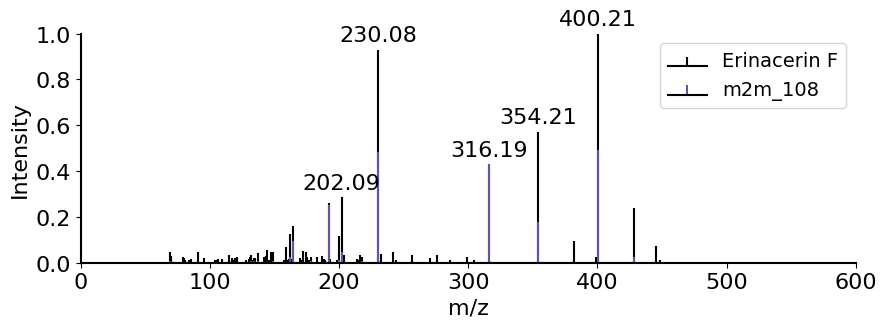

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, color="lightgreen"):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1: Normalized intensity in motif1
    """
    # Plot the fragment
    scaled_height = intensity_suspect * norm_intensity_m1
    ax.plot([frag, frag], [0, scaled_height], color=color, linewidth=1.5)

# Perform overlap check
n = 1105  # erinacerin spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)

# Normalize motif1 intensities
motif1_mz = motif_spectra_200[67].peaks.mz  #motif_108
motif1_intensities = motif_spectra_200[67].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)

# Identify overlapping fragments
green_frags, green_intens, zebra_frags, zebra_intens, labels = check_overlap_1motif(
    cleaned_spectra[n], intensities, motif_spectra_200[67])

# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 1)

# Plot suspect spectrum
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Erinacerin F")

# Plot green fragments (motif1)
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="purple", label="m2m_108")
else:
    one = ax1.stem([0], [0], basefmt="k-", markerfmt="", linefmt="#6A51A3", label="m2m_108")

# Plot overlapping fragments with proportional scaling (zebra fragments for motif1 only)
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensity for the fragment in motif1
        rounded_frag = round(frag, 2)
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        if idx_m1.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, color="#6A51A3")

# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:5]  # Take the top 7

# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)

# Customize plot appearance
ax1.legend(handles=[suspect, one], fontsize=14)  # Adjust the size as needed
ax1.set_ylim(0, 1)
ax1.set_xlim(0,600)
ax1.set_xlabel('m/z', fontsize=16)
ax1.set_ylabel('Intensity', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# Show the plot
plt.subplots_adjust(top=0.95)
ax1.tick_params(axis='x', labelsize=16)  # Change font size of x-axis ticks
ax1.tick_params(axis='y', labelsize=16)
# plt.savefig("suspect_10396.png", dpi=600)
plt.show()


In [21]:
cleaned_spectra[2354].metadata

{'scans': '17224',
 'charge': 1,
 'collision_energy': '0.0',
 'retention_time': 1230.779,
 'ms_level': '2',
 'precursor_mz': 595.3994,
 'ionmode': 'positive',
 'retention_index': None,
 'id': 'spec_2354'}

In [22]:
motif_spectra_200[67].metadata

{'id': 'motif_108',
 'charge': '1',
 'ms2accuracy': '0.005',
 'motifset': 'motifs',
 'short_annotation': 'None',
 'annotation': 'None',
 'auto_annotation': "['CC1CCC2C(C)(C)C(O)C(O)CC2(C)C12Cc1c(O)cc3c(c1O2)CNC3=O']"}

In [23]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_163":
        print(index)

172


In [24]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_90":
        print(index)

126


[91.0548, 119.0495, 147.0441, 149.0596, 177.0547, 217.0858]
[53.0394, 189.0912]
[55.0551, 83.0497, 233.1171, 315.159]


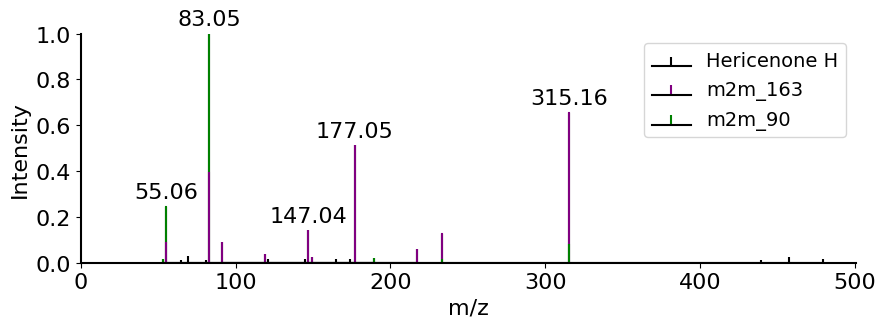

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("red", "lightgreen")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 2354 #erinacerin spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[172].peaks.mz #172 is motif 163
motif1_intensities = motif_spectra_200[172].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[126].peaks.mz #motif 90
motif2_intensities = motif_spectra_200[126].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[172], motif_spectra_200[126])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Hericenone H")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="purple", label="m2m_163")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="green", label="m2m_90")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="green", label="m2m_90")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("purple", "green"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:5]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
    else:
        ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=16)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,)
ax1.set_xlabel('m/z', fontsize=16)
ax1.set_ylabel('Intensity', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
ax1.tick_params(axis='x', labelsize=16)  # Change font size of x-axis ticks
ax1.tick_params(axis='y', labelsize=16)
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


In [26]:
#double ccheck results, peaks correspond to the ones from the figure
motif_spectra_200[172].peaks.mz

array([ 55.06,  69.46,  83.05,  91.05, 119.05, 147.04, 149.06, 177.05,
       217.09, 233.12, 315.16, 613.44])

In [27]:
motif_spectra_200[126].peaks.mz

array([ 53.04,  55.06,  69.42,  83.05,  84.05, 178.06, 189.09, 233.12,
       315.16, 331.15])

In [28]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_186":
        print(index)

46


[53.0393, 55.0551, 83.0497, 189.0911, 233.117, 315.159]
[91.0547, 119.0495, 121.0654, 145.0281, 147.0441, 149.0601, 177.0546, 179.0703, 217.0855]
[]


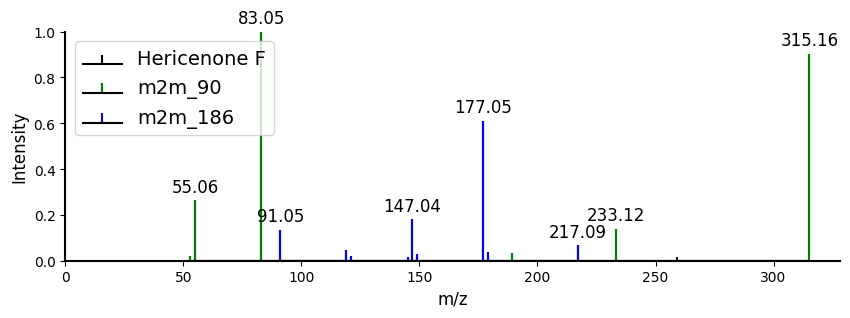

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("red", "lightgreen")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 2287 #erinacerin spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[126].peaks.mz # motif 90
motif1_intensities = motif_spectra_200[126].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[46].peaks.mz #motif 186
motif2_intensities = motif_spectra_200[46].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[126], motif_spectra_200[46])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Hericenone F")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="green", label="m2m_90")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="blue", label="m2m_186")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="blue", label="m2m_186")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("green", "blue"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:8]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
    else:
        ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,)
ax1.set_xlabel('m/z', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


In [30]:
motif_spectra_200[172].peaks.mz

array([ 55.06,  69.46,  83.05,  91.05, 119.05, 147.04, 149.06, 177.05,
       217.09, 233.12, 315.16, 613.44])

In [31]:
motif_spectra_200[46].peaks.mz

array([ 55.02,  65.04,  78.05,  79.05,  89.04,  91.05,  93.07,  95.05,
       105.03, 106.04, 117.03, 119.05, 121.06, 121.07, 123.08, 134.04,
       145.03, 147.04, 149.06, 177.05, 179.07, 195.07, 212.24, 217.09,
       231.1 , 274.27, 275.13, 301.18, 313.14, 331.15])

Erinacerin G node shares the same Mass2Motif as Herinacerin H so we change only the spectra n

[91.0548, 119.0495, 147.0441, 149.06, 177.0547, 217.0859]
[53.0395, 189.0911]
[55.0551, 83.0498, 233.1172, 315.1591]


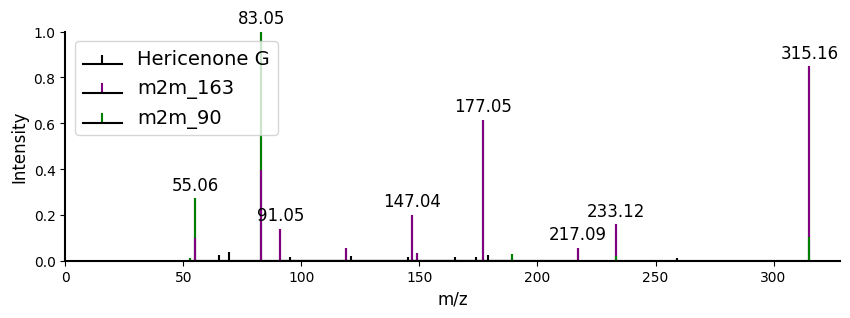

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("red", "lightgreen")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 2583 # spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[172].peaks.mz #172 is motif 163
motif1_intensities = motif_spectra_200[172].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[126].peaks.mz #motif 90
motif2_intensities = motif_spectra_200[126].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[172], motif_spectra_200[126])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Hericenone G")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="purple", label="m2m_163")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="green", label="m2m_90")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="green", label="m2m_90")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("purple", "green"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:8]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
    else:
        ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,)
ax1.set_xlabel('m/z', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


## Now we will find the ergostane spectra - motif family

In [33]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_173":
        print(index)

185


In [34]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_21":
        print(index)

169


[57.0707, 83.0861, 125.1326, 207.1166, 221.1326, 223.1478, 235.1475, 249.1623, 251.1788, 311.2363, 377.3203, 395.3306]
[91.0547, 93.0702, 95.086, 105.0703, 107.0858, 109.1013, 115.0545, 117.0702, 119.086, 123.1173, 128.0621, 129.07, 131.0859, 141.0699, 142.0773, 143.0854, 145.1012, 153.0693, 155.0851, 156.0933, 159.1171, 165.0699, 167.0857, 169.1013, 171.1167, 185.1322, 199.1476, 211.1484, 225.1643]
[55.0551, 69.0706, 157.1011, 179.0857, 181.1013, 183.1163, 195.1171, 197.1331, 209.1322]


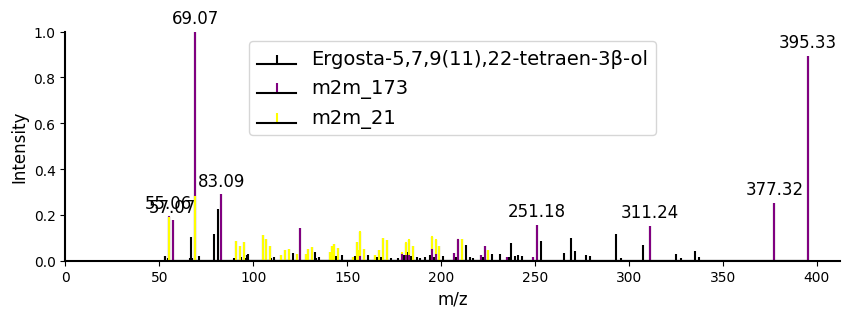

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("purple", "yellow")):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1, norm_intensity_m2: Normalized intensities in motif1 and motif2
    """
    # Determine the larger and smaller normalized intensity
    if norm_intensity_m1 >= norm_intensity_m2:
        larger_intensity, smaller_intensity = norm_intensity_m1, norm_intensity_m2
        larger_color, smaller_color = colors[0], colors[1]
    else:
        larger_intensity, smaller_intensity = norm_intensity_m2, norm_intensity_m1
        larger_color, smaller_color = colors[1], colors[0]
    # Calculate the scaling ratio for the smaller fragment
    scaling_ratio = smaller_intensity / larger_intensity
    # Plot the larger fragment
    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    # Plot the smaller fragment proportionally on top of the larger one
    scaled_height = intensity_suspect * scaling_ratio
    ax.plot([frag, frag], [0, scaled_height], color=smaller_color, linewidth=1.5)
# Perform overlap check
n = 2064 # spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)
# Normalize motif1 and motif2 intensities
motif1_mz = motif_spectra_200[185].peaks.mz #172 is motif 163
motif1_intensities = motif_spectra_200[185].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
motif2_mz = motif_spectra_200[169].peaks.mz #motif 90
motif2_intensities = motif_spectra_200[169].peaks.intensities
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
# Identify overlapping fragments
green_frags, green_intens, blue_frags, blue_intens, zebra_frags, zebra_intens, labels = check_overlap(
    cleaned_spectra[n], intensities, motif_spectra_200[185], motif_spectra_200[169])
# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Ergosta-5,7,9(11),22-tetraen-3β-ol")
# Plot normal lines for motif1 and motif2
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="purple", label="m2m_173")
if blue_frags:
    two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="yellow", label="m2m_21")
else:
    two = ax1.stem([0],[0], basefmt="k-", markerfmt="", linefmt="yellow", label="m2m_21")
# Plot overlapping fragments with proportional scaling
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensities for the fragment in motif1 and motif2
        rounded_frag = round(frag, 2)
        # Use numpy to find the index of the rounded_frag in the mz arrays
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
        # Ensure valid indices are found
        if idx_m1.size > 0 and idx_m2.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            # Plot the overlapping fragments
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, colors=("purple", "yellow"))
# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:8]  # Take the top 7
# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    if round(frag, 2) == 213.16:
         ax1.text(frag, intensity + 0.04, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
    else:
        ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)
ax1.legend(handles=[suspect, one, two], fontsize=14)  # Adjust the size as needed
# Customize plot appearance
ax1.set_ylim(0, 1)
ax1.set_xlim(0,)
ax1.set_xlabel('m/z', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
# Show the plot
plt.subplots_adjust(top=0.95)
#plt.savefig("suspect_10396.png", dpi=600)
plt.show()


For Citreoanthrasteroide B (392 m/z)

In [36]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_173":
        print(index)

185


[]
[55.055, 57.0706, 69.0705, 83.0861, 125.1324, 157.1012, 179.0857, 181.1012, 183.1169, 195.117, 197.1318, 207.1169, 209.1322, 221.1318, 223.1487, 235.1467, 249.1642, 251.1795, 253.1564, 267.1739, 309.2207, 375.3044, 393.3123]


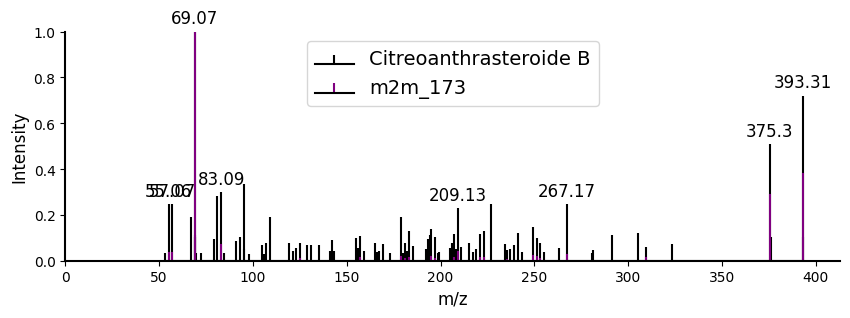

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap(ax, frag, intensity_suspect, norm_intensity_m1, color="lightgreen"):
    """
    Plots overlapping fragments with proportional scaling based on normalized intensity ratios.
    frag: The m/z value of the fragment
    intensity_suspect: Intensity in the suspect spectrum
    norm_intensity_m1: Normalized intensity in motif1
    """
    # Plot the fragment
    scaled_height = intensity_suspect * norm_intensity_m1
    ax.plot([frag, frag], [0, scaled_height], color=color, linewidth=1.5)

# Perform overlap check
n = 1859  # erinacerin spectra
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)

# Normalize motif1 intensities
motif1_mz = motif_spectra_200[185].peaks.mz  #motif_108
motif1_intensities = motif_spectra_200[185].peaks.intensities
norm_motif1_intensities = motif1_intensities / max(motif1_intensities)

# Identify overlapping fragments
green_frags, green_intens, zebra_frags, zebra_intens, labels = check_overlap_1motif(
    cleaned_spectra[n], intensities, motif_spectra_200[185])

# Create plot
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 1)

# Plot suspect spectrum
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Citreoanthrasteroide B")

# Plot green fragments (motif1)
if green_frags:
    one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="purple", label="m2m_173")
else:
    one = ax1.stem([0], [0], basefmt="k-", markerfmt="", linefmt="purple", label="m2m_173")

# Plot overlapping fragments with proportional scaling (zebra fragments for motif1 only)
if zebra_frags:
    for frag in zebra_frags:
        # Get normalized intensity for the fragment in motif1
        rounded_frag = round(frag, 2)
        idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
        if idx_m1.size > 0:
            norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
            intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
            plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, color="purple")

# Determine the top 7 fragments based on intensity
top_fragments = sorted(
    [(frag, rounded_frag, intensities[mass_to_charge.tolist().index(frag)]) for frag, rounded_frag in labels.items()],
    key=lambda x: x[2],  # Sort by intensity
    reverse=True  # Descending order
)[:8]  # Take the top 7

# Add labels for the top 7 fragments
for frag, rounded_frag, intensity in top_fragments:
    ax1.text(frag, intensity + 0.02, f"{rounded_frag}", ha='center', va='bottom', fontsize=12)

# Customize plot appearance
ax1.legend(handles=[suspect, one], fontsize=14)  # Adjust the size as needed
ax1.set_ylim(0, 1)
ax1.set_xlim(0,)
ax1.set_xlabel('m/z', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# Show the plot
plt.subplots_adjust(top=0.95)
# plt.savefig("suspect_10396.png", dpi=600)
plt.show()


Now for Ergost-3,5,7,9(11),22-pentaen

In [38]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_193":
        print(index)

38


In [39]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_0":
        print(index)

112


In [40]:
for index, i in enumerate(motif_spectra_200):
    if i.metadata["id"] == "motif_21":
        print(index)

169


In [41]:
n=1802

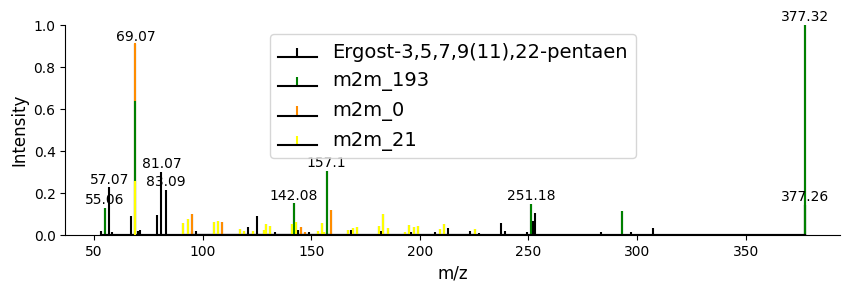

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def check_overlap(spec, intensities, motif1, motif2, motif3):
    # Overlapping categories
    zebra_frags, zebra_intens = [], []
    red_frags, red_intens = [], []
    triple_frags, triple_intens = [], []
    green_frags, green_intens = [], []
    blue_frags, blue_intens = [], []
    
    labels = {}

    for frag, intens in zip(spec.peaks.mz, intensities):
        rounded_frag = round(frag, 2)
        in_m1 = rounded_frag in motif1.peaks.mz
        in_m2 = rounded_frag in motif2.peaks.mz
        in_m3 = rounded_frag in motif3.peaks.mz

        if in_m1 and in_m2 and in_m3:
            triple_frags.append(frag)
            triple_intens.append(intens)
            labels[frag] = rounded_frag
        elif in_m1 and in_m2:
            zebra_frags.append(frag)
            zebra_intens.append(intens)
            labels[frag] = rounded_frag
        elif in_m1:
            green_frags.append(frag)
            green_intens.append(intens)
            labels[frag] = rounded_frag
        elif in_m2:
            blue_frags.append(frag)
            blue_intens.append(intens)
            labels[frag] = rounded_frag
        elif in_m3:
            red_frags.append(frag)
            red_intens.append(intens)
            labels[frag] = rounded_frag

    return (green_frags, green_intens, blue_frags, blue_intens, 
            zebra_frags, zebra_intens, red_frags, red_intens, 
            triple_frags, triple_intens, labels)


def plot_overlap(ax, frag, intensity_suspect, norm_m1, norm_m2, norm_m3, colors=("green", "darkorange", "yellow")):
    intensities = [norm_m1, norm_m2, norm_m3]
    sorted_indices = sorted(range(3), key=lambda i: intensities[i], reverse=True)

    larger_color, mid_color, smaller_color = [colors[i] for i in sorted_indices]
    larger_intensity, mid_intensity, smaller_intensity = [intensities[i] for i in sorted_indices]

    ax.plot([frag, frag], [0, intensity_suspect], color=larger_color, linewidth=1.5)
    
    if mid_intensity > 0:
        ax.plot([frag, frag], [0, intensity_suspect * (mid_intensity / larger_intensity)], color=mid_color, linewidth=1.5)
    
    if smaller_intensity > 0:
        ax.plot([frag, frag], [0, intensity_suspect * (smaller_intensity / larger_intensity)], color=smaller_color, linewidth=1.5)


# Assign suspect spectrum and motifs
n = 1802
mass_to_charge = cleaned_spectra[n].peaks.mz
intensities = cleaned_spectra[n].peaks.intensities / max(cleaned_spectra[n].peaks.intensities)

motif1, motif2, motif3 = motif_spectra_200[38], motif_spectra_200[112], motif_spectra_200[169]
motif1_mz, motif1_intensities = motif1.peaks.mz, motif1.peaks.intensities
motif2_mz, motif2_intensities = motif2.peaks.mz, motif2.peaks.intensities
motif3_mz, motif3_intensities = motif3.peaks.mz, motif3.peaks.intensities

norm_motif1_intensities = motif1_intensities / max(motif1_intensities)
norm_motif2_intensities = motif2_intensities / max(motif2_intensities)
norm_motif3_intensities = motif3_intensities / max(motif3_intensities)

# Identify overlapping fragments
(green_frags, green_intens, blue_frags, blue_intens, 
 zebra_frags, zebra_intens, red_frags, red_intens, 
 triple_frags, triple_intens, labels) = check_overlap(
    cleaned_spectra[n], intensities, motif1, motif2, motif3
)

# Create figure
fig = plt.figure(figsize=(10, 6), facecolor='none', edgecolor='none')
ax1 = fig.add_subplot(2, 1, 2)

# Plot suspect spectrum
suspect = ax1.stem(mass_to_charge, intensities, basefmt="k-", markerfmt="", linefmt="black", label="Ergost-3,5,7,9(11),22-pentaen")
# Annotate peaks
# Annotate the top 10 peaks
top_peaks = sorted(zip(mass_to_charge, intensities), key=lambda x: x[1], reverse=True)[:10]

for frag, inten in top_peaks:
    # Get the intensity of the suspect spectrum for this fragment
    intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
    ax1.text(frag, intensity_suspect + 0.02,  # Offset for visibility
             str(round(frag, 2)), fontsize=10, ha='center', color='black')



# Plot individual motif matches
one = ax1.stem(green_frags, green_intens, basefmt="k-", markerfmt="", linefmt="green", label="m2m_193") if green_frags else None
two = ax1.stem(blue_frags, blue_intens, basefmt="k-", markerfmt="", linefmt="darkorange", label="m2m_0") if blue_frags else None
three = ax1.stem(red_frags, red_intens, basefmt="k-", markerfmt="", linefmt="yellow", label="m2m_21") if red_frags else ax1.stem([0], [0], basefmt="k-", markerfmt="", linefmt="red", label="m2m_75")

# Plot overlapping fragments
for frag in zebra_frags + triple_frags:
    rounded_frag = round(frag, 2)
    idx_m1 = np.where(np.isclose(motif1_mz, rounded_frag, atol=1e-2))[0]
    idx_m2 = np.where(np.isclose(motif2_mz, rounded_frag, atol=1e-2))[0]
    idx_m3 = np.where(np.isclose(motif3_mz, rounded_frag, atol=1e-2))[0]

    if idx_m1.size > 0 and idx_m2.size > 0 and idx_m3.size > 0:
        norm_intensity_m1 = norm_motif1_intensities[idx_m1[0]]
        norm_intensity_m2 = norm_motif2_intensities[idx_m2[0]]
        norm_intensity_m3 = norm_motif3_intensities[idx_m3[0]]
        intensity_suspect = intensities[mass_to_charge.tolist().index(frag)]
        plot_overlap(ax1, frag, intensity_suspect, norm_intensity_m1, norm_intensity_m2, norm_intensity_m3)

# Set plot properties
legend_handles = [h for h in [suspect, one, two, three] if h is not None]
if legend_handles:  # Only add legend if there are valid handles
    ax1.legend(handles=legend_handles, fontsize=14)
ax1.set_ylim(0, 1)
ax1.set_xlabel('m/z', fontsize=12)
ax1.set_ylabel('Intensity', fontsize=12)
ax1.spines[['right', 'top']].set_visible(False)

plt.show()


In [43]:
from MS2LDA.Add_On.MassQL.MassQL4MotifDB import load_motifDB
from MS2LDA.Add_On.MassQL.MassQL4MotifDB import motifDB2motifs

In [ ]:
motifDB_ms1, motifDB_ms2 = load_motifDB("../../MS2LDA/MotifDB/motifDB.json")

In [45]:
motifDB_ms2.head(5) # contains all available Mass2Motif information


,scan,frag_mz,frag_intens,loss_mz,loss_intens,charge,ms2accuracy,short_annotation,annotation,motif_id,...,scientific_name,sample_type,massive_id,taxon_id,analysis_ionizationsource,analysis_chromatographyandphase,analysis_polarity,paper_url,auto_annotation,property
0,00121649bd68236b880fe188d2d7fcff,178.028,0.006147,NaN,NaN,1,0.005,losses indicative for 4-oxo-1 4-dihydroquinoli...,losses indicative for 4-oxo-1 4-dihydroquinoli...,motif_22,...,,Reference molecules,,,electospray ionization,direct infusion (DI),positive ionisation mode,https://gnps.ucsd.edu/ProteoSAFe/static/gnps-s...,[CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1...,None
1,00121649bd68236b880fe188d2d7fcff,179.032,0.005836,NaN,NaN,1,0.005,losses indicative for 4-oxo-1 4-dihydroquinoli...,losses indicative for 4-oxo-1 4-dihydroquinoli...,motif_22,...,,Reference molecules,,,electospray ionization,direct infusion (DI),positive ionisation mode,https://gnps.ucsd.edu/ProteoSAFe/static/gnps-s...,[CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1...,None
2,00121649bd68236b880fe188d2d7fcff,179.037,0.005873,NaN,NaN,1,0.005,losses indicative for 4-oxo-1 4-dihydroquinoli...,losses indicative for 4-oxo-1 4-dihydroquinoli...,motif_22,...,,Reference molecules,,,electospray ionization,direct infusion (DI),positive ionisation mode,https://gnps.ucsd.edu/ProteoSAFe/static/gnps-s...,[CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1...,None
3,00121649bd68236b880fe188d2d7fcff,194.028,0.005689,NaN,NaN,1,0.005,losses indicative for 4-oxo-1 4-dihydroquinoli...,losses indicative for 4-oxo-1 4-dihydroquinoli...,motif_22,...,,Reference molecules,,,electospray ionization,direct infusion (DI),positive ionisation mode,https://gnps.ucsd.edu/ProteoSAFe/static/gnps-s...,[CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1...,None
4,00121649bd68236b880fe188d2d7fcff,195.067,0.013432,NaN,NaN,1,0.005,losses indicative for 4-oxo-1 4-dihydroquinoli...,losses indicative for 4-oxo-1 4-dihydroquinoli...,motif_22,...,,Reference molecules,,,electospray ionization,direct infusion (DI),positive ionisation mode,https://gnps.ucsd.edu/ProteoSAFe/static/gnps-s...,[CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1...,None


In [46]:
from massql4motifs import msql_engine


In [47]:
massql_query_1 = "QUERY scaninfo(MS2DATA) WHERE MS2PROD=192.07:TOLERANCEMZ=0.2 AND MS2PROD=230.08:TOLERANCEMZ=0.2"


In [48]:
query_result_1 = msql_engine.process_query(massql_query_1, ms1_df=motifDB_ms1, ms2_df=motifDB_ms2)


TOTAL QUERIES 1


100%|██████████| 1/1 [00:00<00:00, 25.38it/s]


In [49]:
query_result_1


,motifset,motif_id,short_annotation,annotation,auto_annotation,ms1scan,charge,scan,ms2accuracy,analysis_massspectrometer,...,sample_type,massive_id,taxon_id,analysis_ionizationsource,analysis_chromatographyandphase,analysis_polarity,paper_url,property,i,mslevel
0,MIADB_pos_100,motif_46,Indole_in_Yohimbane_Corynanthean_series,Indole_in_Yohimbane_Corynanthean_series,None,0,1,10af3628b034c57d867c6cd9eac18091,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,13.534565,2
1,MIADB_pos_60,motif_13,Corynanthean_skeleton,Corynanthean_skeleton,None,0,1,13ed7dc0388a4bf5793ea34242de7ec6,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,5.008007,2
2,Urine derived Mass2Motifs,motif_186,Mixed motif of Cyclobenzaprine related metabol...,Mixed motif of Cyclobenzaprine related metabol...,"[CC=C1CN2CCC34C(=Nc5ccccc53)C2CC1C4C(=O)OC, C=...",0,1,27eb5b273af8d2400502b7c0e5d5f6ec,0.005,Orbitrap,...,human urine extracts,"MSV000083538, MSV000081118",,electospray ionization,normal phase (HILIC),positive ionisation mode,http://pubs.acs.org/doi/abs/10.1021/acs.analch...,None,6.980443,2
3,MIADB_pos_100,motif_42,Vobasane-containing-bisindole alkaloids,Vobasane-containing-bisindole alkaloids,None,0,1,3198538407e327c7412876d07dad7353,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,8.378814,2
4,MIADB_pos_60,motif_55,indole_in_Yohimbane_series,indole_in_Yohimbane_series,None,0,1,51a74e83b1a6d38880ea3f13d9a3d704,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,8.948946,2
5,MIADB_pos_60,motif_6,decorated_indole_mostly_type1_MIAskeleton,decorated_indole_mostly_type1_MIAskeleton,None,0,1,5760f1e59807acec6b9ce93a2ceab5fa,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,2.630012,2
6,MIADB_pos_60,motif_51,Indole_in_Sarpagine_skeleton,Indole_in_Sarpagine_skeleton,None,0,1,664d892d398b3c027ce6d744a07f2a6c,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,10.205265,2
7,MIADB_pos_indole,motif_6,Decorated indole related Mass2Motif,Decorated indole related Mass2Motif,None,0,1,9420c8450473658d5ff188eceaae28a1,0.005,Time-Of-Flight (ToF),...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,2.630012,2
8,MIADB_pos_60,motif_39,Vobasane_skeleton,Vobasane_skeleton,None,0,1,9dd82e34002cd4b0e57fa66a958dded9,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,15.655511,2
9,MIADB_pos_100,motif_5,Indole_in_Sarpagine_Corynanthean_skeleton,Indole_in_Sarpagine_Corynanthean_skeleton,None,0,1,b2a6e6207f55b2a9684e6df26eab3157,0.005,other high resolution instrument,...,,,,electospray ionization,reverse phase (C18),positive ionisation mode,,None,9.161939,2


In [50]:
type(query_result_1)

pandas.core.frame.DataFrame

In [55]:
query_result_1.to_csv("motif_108_query_MotifDB.csv", index=False, sep=";")
